In [1]:

import os
import time
import joblib
import warnings
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report 
warnings.filterwarnings(action = 'ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head(50)

HOSPITAL_ID  Teatment_ID        Treatment_Name  Medicine_Charge  \
0            18            0           Heart Block            18231   
1             3            0           Heart Block            39962   
2             8            2      Organ Transplant            52759   
3            14            5                    TB            16719   
4             1            4                Harnia            30836   
5            13            0           Heart Block            60814   
6            15            4                Harnia            15670   
7            18            0           Heart Block            54202   
8            13            3           Brain Tumor            46124   
9            14            7                   ENT            66114   
10           19            7                   ENT            25012   
11            3            7                   ENT            24491   
12            0            3           Brain Tumor            26431   
13            4            5                    TB            45727   
14            8            4                Harnia            25702   
15            0            5                    TB            38066   
16           18            7                   ENT            53001   
17           11            1                Cancer            49066   
18            4            5                    TB            30556   
19           18            7                   ENT            13076   
20           10            1                Cancer            53702   
21           13            1                Cancer            42341   
22           13            1                Cancer            10861   
23            5            3           Brain Tumor            37701   
24           11            3           Brain Tumor            12402   
25           11            1                Cancer            15259   
26            8            0           Heart Block            22570   
27            5            1                Cancer            56552   
28           17            0           Heart Block            44089   
29           12            3           Brain Tumor            38095   
30            7            7                   ENT            12250   
31            1            4                Harnia            23761   
32           16            2      Organ Transplant            56167   
33           12            6  Prosthetic Treatment            33517   
34            4            4                Harnia            17288   
35           18            0           Heart Block            22601   
36           19            7                   ENT            39106   
37           13            0           Heart Block            41981   
38           10            6  Prosthetic Treatment            47118   
39           11            2      Organ Transplant            17996   
40           15            4                Harnia            31250   
41            9            1                Cancer            39959   
42            7            2      Organ Transplant            32247   
43           17            2      Organ Transplant            54620   
44           18            2      Organ Transplant            14277   
45            3            5                    TB            42152   
46           12            2      Organ Transplant            10029   
47            5            3           Brain Tumor            29945   
48           19            5                    TB            57974   
49            8            3           Brain Tumor            38024   

    Hospital_Charge  Doctor_Charge  Surgery  Other_Treatemnt   Price  
0             58767          31357    91525            14102  213982  
1             33418          78063    80603              293  232339  
2             63070          14803   164370             9125  304127  
3             51554          54230   117925            19064  259492  
4             33496        

In [4]:
df.shape

(100000, 9)

In [5]:
df.describe()

HOSPITAL_ID    Teatment_ID  Medicine_Charge  Hospital_Charge  \
count  100000.00000  100000.000000    100000.000000    100000.000000   
mean       10.00484       3.487600     40062.851600     45034.982180   
std         6.05197       2.290611     17343.628823     20202.654484   
min         0.00000       0.000000     10000.000000     10000.000000   
25%         5.00000       1.000000     24975.000000     27612.750000   
50%        10.00000       3.000000     40170.000000     44961.000000   
75%        15.00000       5.000000     55087.000000     62596.250000   
max        20.00000       7.000000     70000.000000     79999.000000   

       Doctor_Charge        Surgery  Other_Treatemnt          Price  
count  100000.000000  100000.000000     100000.00000  100000.000000  
mean    65000.182540  105175.872220      19971.71695  275245.605490  
std     31779.798144   54816.131124      11545.06956   69538.438122  
min     10000.000000   10001.000000          0.00000   63884.000000  
25%     37436.000000   57776.000000       9950.00000  224447.750000  
50%     65075.500000  105161.000000      19957.50000  275148.500000  
75%     92457.000000  152497.000000      30005.00000  325885.000000  
max    119999.000000  199996.000000      40000.00000  488644.000000

In [6]:
df.columns

Index(['HOSPITAL_ID', 'Teatment_ID', 'Treatment_Name', 'Medicine_Charge',
       'Hospital_Charge', 'Doctor_Charge', 'Surgery', 'Other_Treatemnt',
       'Price'],
      dtype='object')

In [7]:
df['HOSPITAL_ID'].unique()

array([18,  3,  8, 14,  1, 13, 15, 19,  0,  4, 11, 10,  5, 17, 12,  7, 16,
        9,  6,  2, 20], dtype=int64)

In [8]:
df['Treatment_Name'].unique()

array(['Heart Block', 'Organ Transplant', 'TB', 'Harnia', 'Brain Tumor',
       'ENT', 'Cancer', 'Prosthetic Treatment'], dtype=object)

In [9]:
df['Teatment_ID'].unique()

array([0, 2, 5, 4, 3, 7, 1, 6], dtype=int64)

In [10]:
#sns.pairplot(df)

<Axes: xlabel='Price', ylabel='Density'>

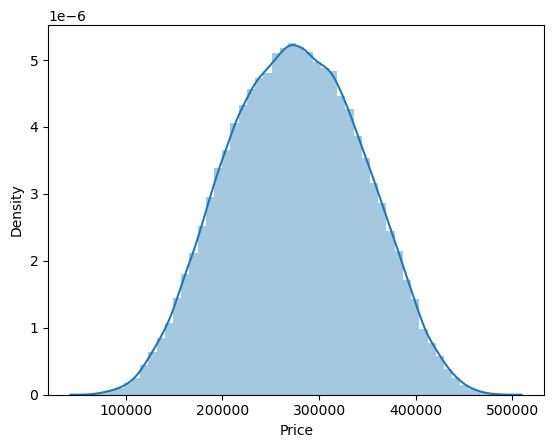

In [11]:
sns.distplot(df['Price'])

<Axes: >

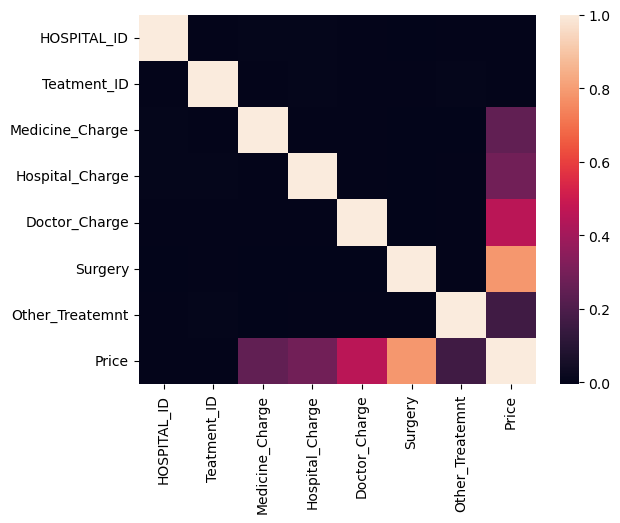

In [12]:
sns.heatmap(df.corr())

In [13]:
l1=['HOSPITAL_ID', 'Teatment_ID']

In [14]:
y = df['Price'].values
X = df[l1]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [16]:
x_train

HOSPITAL_ID  Teatment_ID
65091           15            3
85238           20            7
69308           11            0
24079            6            1
66542            2            6
...            ...          ...
27948            1            3
39458            2            7
86591           12            1
73350           13            2
56047            0            6

[80000 rows x 2 columns]

In [17]:
y_train

array([285579, 366765, 309766, ..., 405803, 335440, 218690], dtype=int64)

In [18]:
len(x_test)

20000

In [19]:
knn = KNeighborsClassifier(n_neighbors=6)

In [20]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [21]:
y_pred = knn.predict(x_test)
print("Prediction : {}".format(y_pred))

Prediction : [161732 193404 162621 ... 261301 246451 136768]


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
p=lr.predict(x_test)

In [26]:
p

array([275311.26446883, 275164.89218223, 275639.30674974, ...,
       275237.56017995, 275425.45589725, 275365.24732154])

In [27]:
print(lr.intercept_)

274836.8499013243


In [28]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
HOSPITAL_ID    22.838286
Teatment_ID    59.172285

In [29]:
plt.scatter(y_test,p)

In [30]:
sns.distplot((y_test-p),bins=50);

In [31]:
joblib.dump(knn,'knn.pkl')

['knn.pkl']

In [32]:
joblib.dump(lr,'lr.pkl')

['lr.pkl']

In [33]:
def Price_MODEL(id):    
    knn = joblib.load('knn.pkl')
    x_new = id
    new_pred = knn.predict([x_new])
    f = open("output.txt","w")
    f.write(str(new_pred))
    f.close()
    current_date = time.asctime()
    print("TEST:  {}".format(new_pred))
    f1 = open("RESULT.txt","w")
    f1.write("TEST:  {}".format(current_date,str(new_pred)))
    f1.close()
    print(new_pred[0])
    return new_pred

In [34]:
l=[7,1]
Price_MODEL(l)

TEST:  [151592]
151592


array([151592], dtype=int64)

In [35]:
l=[8,5]
Price_MODEL(l)

TEST:  [216288]
216288


array([216288], dtype=int64)

In [36]:
l=[8,2]
Price_MODEL(l)

TEST:  [210016]
210016


array([210016], dtype=int64)

In [37]:
l=[2,5]
Price_MODEL(l)

TEST:  [182319]
182319


array([182319], dtype=int64)

In [38]:
l=[3,5]
Price_MODEL(l)

TEST:  [218726]
218726


array([218726], dtype=int64)

In [39]:
df.columns

Index(['HOSPITAL_ID', 'Teatment_ID', 'Treatment_Name', 'Medicine_Charge',
       'Hospital_Charge', 'Doctor_Charge', 'Surgery', 'Other_Treatemnt',
       'Price'],
      dtype='object')

In [40]:
hospital_id=int('1')
treatment_id=int('5')
predicted_price=234427
Treatment_Name=[]
Medicine_Charge=[]
Hospital_Charge=[]
Other_Treatemnt=[]
Doctor_Charge=[]
Surgery=[]
Price=[]
for i in range(len(df)):
    
    if  df['HOSPITAL_ID'][i]==hospital_id:
             
        if df['Teatment_ID'][i]==treatment_id:
            print('tid')
            print('found')
            print(df['Treatment_Name'][i],df['Medicine_Charge'][i],df['Hospital_Charge'][i],df['Doctor_Charge'][i],df['Surgery'][i],df['Other_Treatemnt'][i],df['Price'][i])
            Treatment_Name.append(df['Treatment_Name'][i])
            Medicine_Charge.append(df['Medicine_Charge'][i])
            Hospital_Charge.append(df['Hospital_Charge'][i])
            Other_Treatemnt.append(df['Other_Treatemnt'][i])
            Doctor_Charge.append(df['Doctor_Charge'][i])
            Surgery.append(df['Surgery'][i])
            Price.append(df['Price'][i])
            print('__________________________________________________________________')
            

tid
found
TB 65634 60385 31698 107526 23675 288918
__________________________________________________________________
tid
found
TB 39478 73418 68878 86155 11116 279045
__________________________________________________________________
tid
found
TB 42415 75352 74937 57280 28084 278068
__________________________________________________________________
tid
found
TB 61931 65918 12482 101683 16673 258687
__________________________________________________________________
tid
found
TB 33418 44365 118411 111060 33034 340288
__________________________________________________________________
tid
found
TB 42136 13686 47005 14358 27409 144594
__________________________________________________________________
tid
found
TB 63203 49816 40039 84417 34059 271534
__________________________________________________________________
tid
found
TB 16375 47885 25420 23681 25036 138397
__________________________________________________________________
tid
found
TB 24706 75695 30558 97191 38485 266635
__________

__________________________________________________________________
tid
found
TB 50774 58192 72185 62917 17195 261263
__________________________________________________________________
tid
found
TB 50161 47089 64187 119659 20222 301318
__________________________________________________________________
tid
found
TB 43580 68382 55889 36755 23667 228273
__________________________________________________________________
tid
found
TB 22349 17839 35845 115838 37550 229421
__________________________________________________________________
tid
found
TB 66785 47963 116475 178832 5915 415970
__________________________________________________________________
tid
found
TB 51357 67449 38482 54960 3961 216209
__________________________________________________________________
tid
found
TB 62824 58720 47205 35168 30639 234556
__________________________________________________________________
tid
found
TB 22427 13910 89243 105027 14041 244648
_____________________________________________________________

tid
found
TB 42413 28619 55482 115934 29760 272208
__________________________________________________________________
tid
found
TB 52800 65904 15932 137395 2153 274184
__________________________________________________________________
tid
found
TB 40153 32335 17412 56690 23660 170250
__________________________________________________________________
tid
found
TB 14170 64087 82017 154073 11324 325671
__________________________________________________________________
tid
found
TB 56560 49680 87057 87550 5284 286131
__________________________________________________________________
tid
found
TB 29773 59015 15688 136412 27013 267901
__________________________________________________________________
tid
found
TB 44174 72909 51348 178168 38083 384682
__________________________________________________________________
tid
found
TB 23615 17705 62563 136760 14786 255429
__________________________________________________________________
tid
found
TB 61041 51075 50543 172295 3351 338305
__________

tid
found
TB 49054 18918 73311 68688 3185 213156
__________________________________________________________________
tid
found
TB 69867 28823 13867 141742 26833 281132
__________________________________________________________________
tid
found
TB 63155 18240 109199 134763 2440 327797
__________________________________________________________________
tid
found
TB 17107 14283 10113 180526 15077 237106
__________________________________________________________________
tid
found
TB 44688 11026 74363 93844 32524 256445
__________________________________________________________________
tid
found
TB 15931 37926 93019 136182 31307 314365
__________________________________________________________________
tid
found
TB 41147 15426 115517 121759 33334 327183
__________________________________________________________________
tid
found
TB 63399 78566 32364 123285 3038 300652
__________________________________________________________________
tid
found
TB 61267 23529 15211 90809 12589 203405
_________

tid
found
TB 28933 14264 83347 52351 38623 217518
__________________________________________________________________
tid
found
TB 13660 56926 105714 19559 2048 197907
__________________________________________________________________
tid
found
TB 47694 52569 64500 164781 2991 332535
__________________________________________________________________
tid
found
TB 59455 74621 13923 129341 22099 299439
__________________________________________________________________
tid
found
TB 45940 44633 73706 53372 33430 251081
__________________________________________________________________
tid
found
TB 19550 67168 47232 182291 39455 355696
__________________________________________________________________
tid
found
TB 30755 21767 26871 100126 38668 218187
__________________________________________________________________
tid
found
TB 10553 37738 34295 97551 5612 185749
__________________________________________________________________
tid
found
TB 51389 72145 64618 150071 5021 343244
____________

__________________________________________________________________
tid
found
TB 22226 46261 108110 106426 39372 322395
__________________________________________________________________
tid
found
TB 23725 32298 34717 194412 20673 305825
__________________________________________________________________
tid
found
TB 24948 57389 81877 136444 37787 338445
__________________________________________________________________
tid
found
TB 69305 53579 32278 37205 31106 223473
__________________________________________________________________
tid
found
TB 46193 14170 94675 15618 16572 187228
__________________________________________________________________
tid
found
TB 61728 26271 15940 168571 20448 292958
__________________________________________________________________
tid
found
TB 69530 33360 100448 137091 490 340919
__________________________________________________________________
tid
found
TB 56143 59570 67156 71875 11143 265887
___________________________________________________________

In [41]:
Price

[288918,
 279045,
 278068,
 258687,
 340288,
 144594,
 271534,
 138397,
 266635,
 226654,
 164958,
 290752,
 387662,
 209719,
 364102,
 166817,
 177780,
 104863,
 369328,
 263040,
 265690,
 300242,
 276365,
 276892,
 410899,
 211824,
 310389,
 300517,
 286114,
 208540,
 275745,
 326336,
 133508,
 423797,
 203180,
 187849,
 145879,
 394339,
 349784,
 242875,
 221562,
 192815,
 322325,
 346958,
 295349,
 242689,
 208210,
 332703,
 327911,
 343876,
 246911,
 303383,
 351778,
 343705,
 292032,
 266025,
 322722,
 292115,
 235004,
 156959,
 175766,
 248248,
 210816,
 314439,
 166079,
 226859,
 193276,
 306843,
 297408,
 177978,
 334758,
 294517,
 246447,
 264772,
 324519,
 206316,
 271593,
 277164,
 204680,
 367574,
 261263,
 301318,
 228273,
 229421,
 415970,
 216209,
 234556,
 244648,
 295643,
 235669,
 365145,
 321315,
 183555,
 320707,
 262613,
 319335,
 207906,
 244193,
 218860,
 191427,
 286587,
 177833,
 333230,
 196532,
 273897,
 336736,
 321143,
 179980,
 185730,
 226016,
 223805,
 

In [42]:
def closest_value(input_list, input_value):
 
  arr = np.asarray(input_list)
 
  i = (np.abs(arr - input_value)).argmin()
 
  return arr[i]

In [43]:
val=closest_value(Price,predicted_price)
 
print(val)

234545


In [44]:
index=Price.index(val)

In [45]:
predicted_price

234427

In [46]:
Treatment_Name[index]

'TB'

In [47]:
Medicine_Charge[index]

21069

In [48]:
Hospital_Charge[index]

23665

In [49]:
Other_Treatemnt[index]

19586

In [50]:
Doctor_Charge[index]

100812

In [51]:
Surgery[index]

69413

In [52]:
Medicine_Charge[index]+Hospital_Charge[index]+Other_Treatemnt[index]+Doctor_Charge[index]+Surgery[index]

234545

In [53]:
df.columns

Index(['HOSPITAL_ID', 'Teatment_ID', 'Treatment_Name', 'Medicine_Charge',
       'Hospital_Charge', 'Doctor_Charge', 'Surgery', 'Other_Treatemnt',
       'Price'],
      dtype='object')

In [54]:
hids=df['HOSPITAL_ID'].unique()

In [55]:
hids=list(hids)

In [56]:
hids.sort()

In [57]:
hids

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [58]:
tids=df['Teatment_ID'].unique()
tids=list(tids)
tids.sort()
tids

[0, 1, 2, 3, 4, 5, 6, 7]

In [59]:
predicted_price=[]
tid=5
for h in hids:
    pprice=Price_MODEL([h,tid])
    #print("price ======","in ",h,"=========",pprice)
    predicted_price.append(pprice)
    #time.sleep(2)

for i in range(len(predicted_price)):
    print("hid ",i,'=>',predicted_price[i])
    
min_price=min(predicted_price)
min_hid=predicted_price.index(min_price)
print("Selected hospital ",min_hid," predicted price ",min_price)

Treatment_Name=[]
Medicine_Charge=[]
Hospital_Charge=[]
Other_Treatemnt=[]
Doctor_Charge=[]
Surgery=[]
Price=[]
for i in range(len(df)):

    if  df['HOSPITAL_ID'][i]==float(min_hid):

        if df['Teatment_ID'][i]==float(tid):
            #print('****************************************')
            #print(df['HOSPITAL_ID'][i],df['Teatment_ID'][i])
            #print('##########################################')

            #print(df['Treatment_Name'][i],df['Medicine_Charge'][i],df['Hospital_Charge'][i],df['Doctor_Charge'][i],df['Surgery'][i],df['Other_Treatemnt'][i],df['Price'][i])
            Treatment_Name.append(df['Treatment_Name'][i])
            Medicine_Charge.append(df['Medicine_Charge'][i])
            Hospital_Charge.append(df['Hospital_Charge'][i])
            Other_Treatemnt.append(df['Other_Treatemnt'][i])
            Doctor_Charge.append(df['Doctor_Charge'][i])
            Surgery.append(df['Surgery'][i])
            Price.append(df['Price'][i])
            #print('__________________________________________________________________')
#print(price,pprice)
val=closest_value(Price,pprice)
print('val',val)
index=Price.index(val)
tname=Treatment_Name[index]
mc=Medicine_Charge[index]
hc=Hospital_Charge[index]
ot=Other_Treatemnt[index]
dc=Doctor_Charge[index]
s=Surgery[index]
print(tname,mc,hc,ot,dc,s,pprice)
f=open('ai_predict.txt','w')
print(str(tname)+"#"+str(mc)+"#"+str(hc)+"#"+str(ot)+"#"+str(dc)+"#"+str(s)+"#"+str(pprice[0]))
f.write(str(tname)+"#"+str(mc)+"#"+str(hc)+"#"+str(ot)+"#"+str(dc)+"#"+str(s)+"#"+str(pprice[0]))
f=open("task.txt","w")
f.write("")
f.close()
print("*************************************************************************************************************")

TEST:  [183410]
183410
TEST:  [167302]
167302
TEST:  [182319]
182319
TEST:  [218726]
218726
TEST:  [221149]
221149
TEST:  [176326]
176326
TEST:  [186876]
186876
TEST:  [147953]
147953
TEST:  [216288]
216288
TEST:  [218600]
218600
TEST:  [214310]
214310
TEST:  [121948]
121948
TEST:  [170555]
170555
TEST:  [132272]
132272
TEST:  [185615]
185615
TEST:  [290289]
290289
TEST:  [176073]
176073
TEST:  [188208]
188208
TEST:  [227493]
227493
TEST:  [142351]
142351
TEST:  [169027]
169027
hid  0 => [183410]
hid  1 => [167302]
hid  2 => [182319]
hid  3 => [218726]
hid  4 => [221149]
hid  5 => [176326]
hid  6 => [186876]
hid  7 => [147953]
hid  8 => [216288]
hid  9 => [218600]
hid  10 => [214310]
hid  11 => [121948]
hid  12 => [170555]
hid  13 => [132272]
hid  14 => [185615]
hid  15 => [290289]
hid  16 => [176073]
hid  17 => [188208]
hid  18 => [227493]
hid  19 => [142351]
hid  20 => [169027]
Selected hospital  11  predicted price  [121948]
val 169301
TB 32512 56783 32598 15466 31942 [169027]
TB#32

In [ ]:
import time
while True:
    f=open("task.txt","r")
    task=f.read()
    f.close()
    if task=='predict':
        f=open("input.txt","r")
        a=f.read()
        f.close()
        a=a.split("\n")
        print(a)
        a[0]=int(a[0])
        a[1]=int(a[1])
        predicted_price=[]
        tid=a[1]
        for h in hids:
            pprice=Price_MODEL([h,tid])
            #print("price ======","in ",h,"=========",pprice)
            predicted_price.append(pprice)
            #time.sleep(2)

        for i in range(len(predicted_price)):
            print("hid ",i,'=>',predicted_price[i])

        min_price=min(predicted_price)
        min_hid=predicted_price.index(min_price)
        print("Selected hospital ",min_hid," predicted price ",min_price)

        Treatment_Name=[]
        Medicine_Charge=[]
        Hospital_Charge=[]
        Other_Treatemnt=[]
        Doctor_Charge=[]
        Surgery=[]
        Price=[]
        for i in range(len(df)):

            if  df['HOSPITAL_ID'][i]==float(min_hid):

                if df['Teatment_ID'][i]==float(tid):
                    #print('****************************************')
                    #print(df['HOSPITAL_ID'][i],df['Teatment_ID'][i])
                    #print('##########################################')

                    #print(df['Treatment_Name'][i],df['Medicine_Charge'][i],df['Hospital_Charge'][i],df['Doctor_Charge'][i],df['Surgery'][i],df['Other_Treatemnt'][i],df['Price'][i])
                    Treatment_Name.append(df['Treatment_Name'][i])
                    Medicine_Charge.append(df['Medicine_Charge'][i])
                    Hospital_Charge.append(df['Hospital_Charge'][i])
                    Other_Treatemnt.append(df['Other_Treatemnt'][i])
                    Doctor_Charge.append(df['Doctor_Charge'][i])
                    Surgery.append(df['Surgery'][i])
                    Price.append(df['Price'][i])
                    #print('__________________________________________________________________')
        #print(price,pprice)
        val=closest_value(Price,pprice)
        print('val',val)
        index=Price.index(val)
        tname=Treatment_Name[index]
        mc=Medicine_Charge[index]
        hc=Hospital_Charge[index]
        ot=Other_Treatemnt[index]
        dc=Doctor_Charge[index]
        s=Surgery[index]
        print(tname,mc,hc,ot,dc,s,pprice)
        f=open('ai_predict.txt','w')
        print(str(tname)+"#"+str(mc)+"#"+str(hc)+"#"+str(ot)+"#"+str(dc)+"#"+str(s)+"#"+str(pprice[0])+"#"+str(min_hid))
        f.write(str(tname)+"#"+str(mc)+"#"+str(hc)+"#"+str(ot)+"#"+str(dc)+"#"+str(s)+"#"+str(pprice[0])+"#"+str(min_hid))
        f=open("task.txt","w")
        f.write("")
        f.close()
        print("*************************************************************************************************************")